# Wine Dataset Analysis

About Dataset
This is a subset of wines from around the world.

Features:

##### Title: The name or title of the wine.
##### Description: A brief textual description providing additional details about the wine.
##### Price: The cost of the wine.
##### Capacity: The volume or size of the wine bottle.
##### Grape: The primary grape variety used in making the wine.
##### Secondary Grape Varieties: Additional grape varieties used in the wine blend.
##### Closure: The type of closure used for the bottle.
##### Country: The country where the wine is produced.
##### Characteristics: The "Characteristics" feature encapsulates the unique and discernible flavors and aromas present in a particular wine.
##### Per bottle / case / each: The quantity of wine included per unit (bottle, case, or each) sold.
##### Type: The general category of the wine.
##### ABV: The percentage of alcohol content in the wine.
##### Region: The geographic region where the grapes used to make the wine are grown.
##### Style: This feature describes the overall sensory experience and characteristics of the wine.
##### Vintage: The year the grapes used to make the wine were harvested.
##### Appellation: A legally defined and protected geographical indication used to identify where the grapes for a wine were grown.

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # Chart

In [87]:
wine_original = pd.read_csv('/kaggle/input/wine-dataset/WineDataset.csv')

# create copy
wines = wine_original

# size data set
wines.shape

(1290, 17)

In [88]:
# Change the name of the wine as index
wines = wines.set_index('Title')

# information of columns
wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, The Guv'nor, Spain to Yalumba 'Virgilius' Viognier 2017, Eden Valley
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Description                1286 non-null   object 
 1   Price                      1290 non-null   object 
 2   Capacity                   1290 non-null   object 
 3   Grape                      1275 non-null   object 
 4   Secondary Grape Varieties  488 non-null    object 
 5   Closure                    1279 non-null   object 
 6   Country                    1284 non-null   object 
 7   Unit                       1281 non-null   float64
 8   Characteristics            1253 non-null   object 
 9   Per bottle / case / each   1290 non-null   object 
 10  Type                       1285 non-null   object 
 11  ABV                        1281 non-null   object 
 12  Region                     1124 non-null   object 

In [89]:
# Decription of object columns
wines.describe(include='object')

,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
count,1286,1290,1290,1275,488,1279,1284,1253,1290,1285,1281,1124,1212,1283,644
unique,1283,128,13,113,198,4,25,888,3,7,33,94,16,30,179
top,Nicolás Catena was the first South American wi...,£11.99 per bottle,75CL,Chardonnay,"Pinot Noir, Pinot Meunier",Natural Cork,France,"Strawberry, Peach, Raspberry",per bottle,White,ABV 13.50%,Burgundy,Savoury & Full Bodied,2022,Rioja
freq,3,100,1193,237,36,834,502,17,1279,584,249,101,154,318,45


In [90]:
wines['Price'].value_counts()

Price
£11.99 per bottle     100
£14.99 per bottle      96
£9.99 per bottle       91
£13.99 per bottle      77
£16.99 per bottle      67
                     ... 
£70.00 per bottle       1
£265.00 per bottle      1
£210.00 per bottle      1
£41.99 per bottle       1
£40.00 per bottle       1
Name: count, Length: 128, dtype: int64

In [91]:
# replace value extra of the price column to estandarize
wines['Price'] = wines['Price'].str.replace(" per bottle", "")
wines['Price'] = wines['Price'].str.replace(" per case", "")
wines['Price'] = wines['Price'].str.replace(" each", "")
wines['Price'] = wines['Price'].str.replace("£", "")

In [92]:
# change Price column the string to float64
wines["Price"] = wines["Price"].astype(float)
wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, The Guv'nor, Spain to Yalumba 'Virgilius' Viognier 2017, Eden Valley
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Description                1286 non-null   object 
 1   Price                      1290 non-null   float64
 2   Capacity                   1290 non-null   object 
 3   Grape                      1275 non-null   object 
 4   Secondary Grape Varieties  488 non-null    object 
 5   Closure                    1279 non-null   object 
 6   Country                    1284 non-null   object 
 7   Unit                       1281 non-null   float64
 8   Characteristics            1253 non-null   object 
 9   Per bottle / case / each   1290 non-null   object 
 10  Type                       1285 non-null   object 
 11  ABV                        1281 non-null   object 
 12  Region                     1124 non-null   object 

In [93]:
# Check capacity column
wines['Capacity'].value_counts()

Capacity
75CL      1193
37.5CL      23
750ML       18
1.5LTR      18
150CL       11
50CL         8
Our          6
2.25L        4
70CL         3
500ML        3
300CL        1
5LITRE       1
375ML        1
Name: count, dtype: int64

In [94]:
# Change all value to mililiters
wines['Capacity'] = wines['Capacity'].str.replace('75CL', '750')
wines['Capacity'] = wines['Capacity'].str.replace('37.5CL', '375')
wines['Capacity'] = wines['Capacity'].str.replace('1.5LTR', '1500')
wines['Capacity'] = wines['Capacity'].str.replace('150CL', '1500')
wines['Capacity'] = wines['Capacity'].str.replace('50CL', '500')
wines['Capacity'] = wines['Capacity'].str.replace('2.25L', '2250')
wines['Capacity'] = wines['Capacity'].str.replace('70CL', '700')
wines['Capacity'] = wines['Capacity'].str.replace('300CL', '3000')
wines['Capacity'] = wines['Capacity'].str.replace('5LITRE', '5000')
wines['Capacity'] = wines['Capacity'].str.replace('ML', '')
wines['Capacity'] = wines['Capacity'].str.replace('Our', '0')

# Change to integer
wines['Capacity'] = wines['Capacity'].astype(int)

In [95]:
# Drop Unit column no explication for column data 
wines = wines.drop(['Unit'], axis=1)


wines.describe()

,Price,Capacity
count,1290.00000,1290.000000
mean,28.58569,763.837209
std,35.54388,207.754080
min,4.99000,0.000000
25%,12.99000,750.000000
50%,16.99000,750.000000
75%,29.99000,750.000000
max,430.00000,5000.000000


In [96]:
# Drop 6 value Wines with capacity 0
wines.loc[wines['Capacity'] > 0].describe()



,Price,Capacity
count,1284.000000,1284.000000
mean,28.374346,767.406542
std,35.447106,201.549848
min,4.990000,375.000000
25%,12.990000,750.000000
50%,16.990000,750.000000
75%,29.990000,750.000000
max,430.000000,5000.000000


In [97]:
wines.columns

Index(['Description', 'Price', 'Capacity', 'Grape',
       'Secondary Grape Varieties', 'Closure', 'Country', 'Characteristics',
       'Per bottle / case / each', 'Type', 'ABV', 'Region', 'Style', 'Vintage',
       'Appellation'],
      dtype='object')

## Most popular country wines in this list

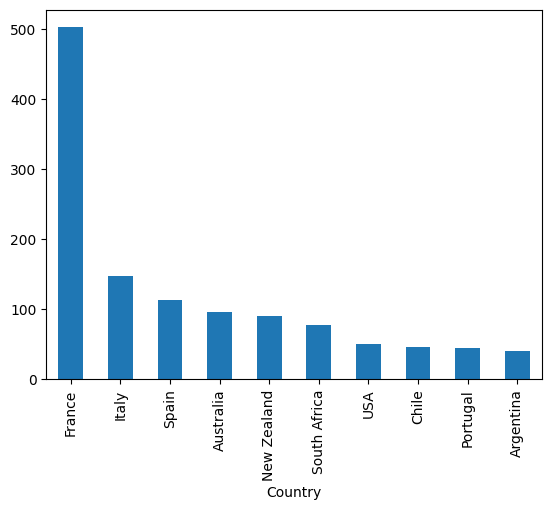

In [99]:
# Country with more wines in this list
top_wines_pro = wines['Country'].value_counts().head(10).plot(kind='bar')


## More expensive Wines

In [98]:
# top 10 more expensive wines in this list 
sort_price = wines.sort_values(by=['Price'],ascending=False)
sort_price.head(10)

,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
Title,,,,,,,,,,,,,,,
Krug 2004/08 Champagne,Krug Vintage Champagne is a blend of the most ...,430.0,750,Chardonnay,"Pinot Noir, Pinot Meunier",Natural Cork,France,"Peach, Almond, Apricot, Biscuit, Bread, Green ...",per bottle,White,ABV 12.50%,NaN,Rich & Toasty,2008,NaN
Armand de Brignac Brut Champagne,It’s not just the bottle that will turn heads....,315.0,750,Chardonnay,"Pinot Meunier, Pinot Noir",Natural Cork,France,"Apricot, Bread, Pastry",per bottle,White,ABV 12.50%,NaN,Rich & Toasty,NV,NaN
Bollinger R.D. 2008 Champagne,RD is kept 'on the lees' in Bollinger's cellar...,310.0,750,Pinot Noir,"Pinot Noir, Pinot Meunier",Natural Cork,France,"Citrus Fruit, Almond, Biscuit, Bread",per bottle,White,ABV 12.00%,NaN,Rich & Toasty,2008,NaN
Louis Roederer Cristal 2013,Cristal Champagne was first designed upon requ...,300.0,750,Pinot Noir,Chardonnay,Natural Cork,France,"Hazelnut, Nectarine, Wet Stones",per bottle,White,ABV 12.00%,NaN,Rich & Toasty,2013,NaN
Louis Roederer 'Cristal' Champagne 2015,Cristal is Louis Roederer’s flagship wine. It ...,300.0,750,Chardonnay,NaN,Natural Cork,France,NaN,per bottle,White,ABV 12.00%,NaN,NaN,2015,NaN
Veuve Clicquot 'La Grande Dame Rosé' 2008,This is the showcase of Veuve Clicquot's excel...,300.0,750,Pinot Noir,Chardonnay,Natural Cork,France,"Strawberry, Blackberry, Blackcurrant, Red Cher...",per bottle,Rosé,ABV 12.50%,NaN,Crisp & Fruity,2008,NaN
Dom Ruinart 2009/10 Champagne,"This great vintage boasts a unique complexity,...",280.0,750,Chardonnay,"Pinot Noir, Pinot Meunier",Natural Cork,France,"Green Apple, Almond, Apricot, Biscuit, Bread, ...",per bottle,White,ABV 12.50%,NaN,Rich & Toasty,2010,NaN
"Sassicaia 2019/20, Bolgheri",Sassicaia is widely acknowledged as one of the...,270.0,750,Cabernet Sauvignon,Cabernet Franc,Natural Cork,Italy,"Spice, Black Fruit, Herbaceous",per bottle,Red,ABV 14.00%,Tuscany,Savoury & Full Bodied,2019,Bolgheri
Pol Roger 'Sir Winston Churchill' 2013/15 Vintage Champagne,The clue's in the name. Pol Roger created this...,265.0,750,Chardonnay,Pinot Noir,Natural Cork,France,"Peach, Almond, Biscuit, Bread, Citrus Fruit",per bottle,White,ABV 12.50%,NaN,Rich & Toasty,2015,NaN


## Type of Wine

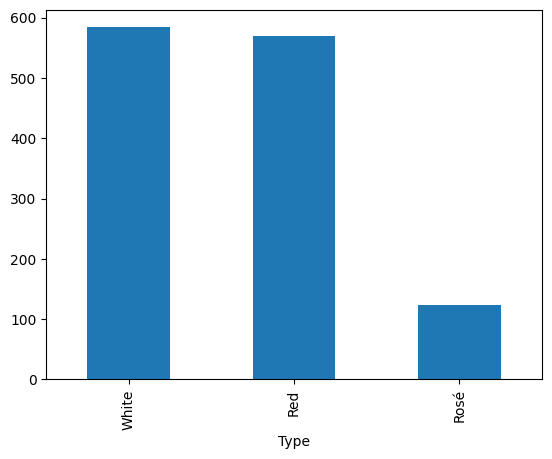

In [103]:
# More Fequent type of wine
type_wine = wines['Type'].value_counts().head(3).plot(kind='bar')

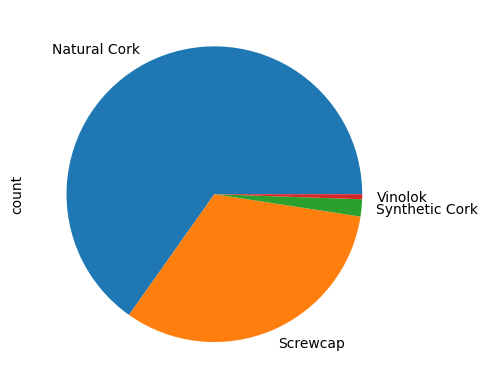

In [112]:
'''Closure is a term used in the wine industry to refer to a stopper, the object used to seal a bottle and avoid harmful contact 
between the wine and oxygen.'''

Closure_wines = wines['Closure'].value_counts().plot(kind='pie')

## More Fequent ABV level in this list of wines

<Axes: xlabel='ABV'>

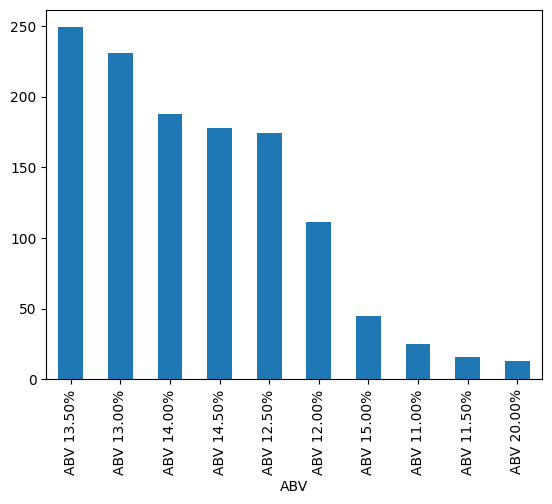

In [120]:
'''ABV is the global standard of measurement for alcohol content. The range of ABV for unfortified wine is about 5.5% to 16%, with an average 
of 11.6%. Fortified wines range from 15.5% to 25% ABV, with an average of 18%.'''

ABV_wines = wines['ABV'].value_counts()
ABV_wines.head(10).plot(kind='bar')

## Year clasification top value

<Axes: xlabel='Vintage'>

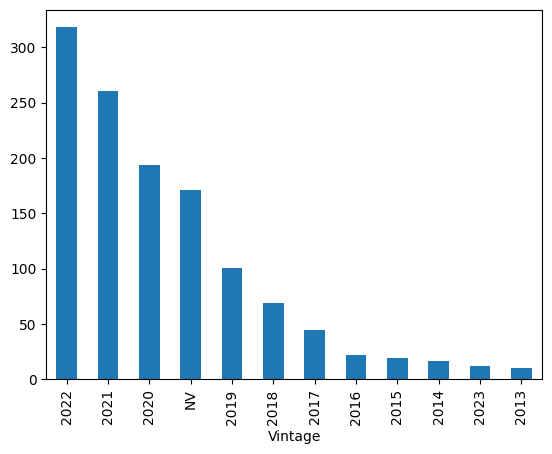

In [123]:
wines['Vintage'].value_counts().head(12).plot(kind='bar')

## Capacity distribution in milliliters

In [125]:
wines['Capacity'].value_counts()

Capacity
750     1211
1500      29
375       24
500       11
0          6
2250       4
700        3
3000       1
5000       1
Name: count, dtype: int64